# Desafio Ifood

## Introdução
Nesta análise, exploraremos o conjunto de dados do iFood proposto pelo projeto E.B.A, desenvolvido por Renata Biaggi. Nosso objetivo é investigar e responder a várias questões sobre o perfil e o comportamento dos clientes presentes no dataset.

### Questões a serem respondidas:
1. Exploração Inicial do Dataset:

- Quantos dados temos?
- Quais são as colunas numéricas?
- Existem duplicados na nossa base de dados?
- Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles? 
- Quais são as estatísticas descritivas das colunas numéricas (média, mediana, percentis 25 e 75 percentil, mínimo e máximo)?

2. Entendendo o Perfil dos Clientes:

- Qual é o maior salário encontrado na nossa base?
- Como é a distribuição salarial entre os clientes? Existe uma ampla variação entre clientes que ganham muito bem e aqueles que ganham menos?
- Qual é o nível de educação dos nossos clientes?
- Quantos clientes temos em cada estado civil?

3. Análise de Correlações:

- Existe uma relação entre o estado civil e o número de filhos? As pessoas casadas tendem a ter mais filhos?
- O número de filhos influencia nos gastos na nossa plataforma? As pessoas com filhos gastam mais ou menos?
- A renda impacta nos gastos? Pessoas com maiores salários tendem a gastar mais?
- Qual a melhor estratégia para aumentar o engajamento de clientes em menor ascensão sobre os gastos na plataforma?
- Qual a relação entre a idade e os gastos em nossa plataforma? Pessoas com maior idade tendem a gastar mais ou menos? 
- A faixa etária que mais gasta é a que tem os maiores salários?

4. Objetivos da Análise

Ao final desta análise, esperamos obter uma compreensão detalhada sobre o perfil dos clientes do iFood, identificar padrões de comportamento e analisar como diferentes fatores se relacionam entre si. Isso nos permitirá insights valiosos sobre a base de clientes e potencialmente orientar estratégias de marketing e atendimento.



In [217]:
#Importando as bibliotecas necessárias.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [218]:
# Armazenando o DataFrame em uma variável.
df = pd.read_csv("C:/Users/lokpe/OneDrive/Documentos/Csv-Eba/mkt_data.csv")

In [219]:
# Observando o DataFrame e retirando os avisos do seaborn 
df
warnings.simplefilter(action="ignore", category=FutureWarning)

#### 1. Exploração Inicial do Dataset:

- Quantos dados temos?
- Quais são as colunas numéricas?
- Existem duplicados na nossa base de dados?
- Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles? 
- Quais são as estatísticas descritivas das colunas numéricas (média, mediana, percentis 25 e 75 percentil, mínimo e máximo)?

In [220]:
df.shape

(2205, 44)

##### Quantos dados temos?

Aqui, podemos informar que este DataFrame contém 2.205 linhas e 44 colunas.

#### Quais são as colunas numéricas?

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Acima, observamos os dados numéricos adquiridos.

#### Existem duplicados na nossa base de dados? Se sim, o que exatamente eles representam?

In [222]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2200    False
2201    False
2202    False
2203    False
2204    False
Length: 2205, dtype: bool

In [223]:
df.duplicated().sum()

0

Como podemos observar nas duas cédulas acima, não temos dados duplicados. 

#### Temos dados nulos nessa base?

In [224]:
df.isnull()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2201,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2202,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


Aqui, podemos observar que há dados nulos; porém, eles são dados categóricos, representando respostas como 'sim' e 'não'. Portanto, podemos considerar que as respostas nulas indicam uma negativa.

In [225]:
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [226]:
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [227]:
df_ops = df.fillna(0)

In [228]:
df_ops.isnull()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Dados nulos tratados, com o objetivo de trazer maior embasamento nas respostas, eles foram tratados como negativas tendo em vista que a base busca trazer informações com dados categóricos nessas colunas

#### Quais são as estatísticas descritivas das colunas numéricas?

Aqui, vamos calcular a média, a mediana, os percentis 25 e 75, o mínimo e o máximo.

In [229]:
single = df['marital_Single'].sum()
widow = df['marital_Widow'].sum()
divorced = df['marital_Divorced'].sum()
married = df['marital_Married'].sum()
toghether = df['marital_Together'].sum()

print(f' marital_Single: {single}\n marital_Widow: {widow}\n marital_Divorced: {divorced}\n marital_Married: {married}\n marital_Together: {toghether}')

 marital_Single: 1908.0
 marital_Widow: 152.0
 marital_Divorced: 230.0
 marital_Married: 4270.0
 marital_Together: 1704.0


In [230]:
num_values = df_ops.select_dtypes(include=['int64', 'float64'])

#### Média

In [231]:
num_values.mean()

Unnamed: 0               1102.000000
Income                  51622.094785
Kidhome                     0.442177
Teenhome                    0.506576
Recency                    49.009070
MntWines                  306.164626
MntFruits                  26.403175
MntMeatProducts           165.312018
MntFishProducts            37.756463
MntSweetProducts           27.128345
MntGoldProds               44.057143
NumDealsPurchases           2.318367
NumWebPurchases             4.100680
NumCatalogPurchases         2.645351
NumStorePurchases           5.823583
NumWebVisitsMonth           5.336961
AcceptedCmp3                0.073923
AcceptedCmp4                0.074376
AcceptedCmp5                0.073016
AcceptedCmp1                0.064399
AcceptedCmp2                0.013605
Complain                    0.009070
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.151020
Age                        51.095692
Customer_Days            2512.718367
m

#### Mediana

In [232]:
num_values.median()

Unnamed: 0               1102.0
Income                  51287.0
Kidhome                     0.0
Teenhome                    0.0
Recency                    49.0
MntWines                  178.0
MntFruits                   8.0
MntMeatProducts            68.0
MntFishProducts            12.0
MntSweetProducts            8.0
MntGoldProds               25.0
NumDealsPurchases           2.0
NumWebPurchases             4.0
NumCatalogPurchases         2.0
NumStorePurchases           5.0
NumWebVisitsMonth           6.0
AcceptedCmp3                0.0
AcceptedCmp4                0.0
AcceptedCmp5                0.0
AcceptedCmp1                0.0
AcceptedCmp2                0.0
Complain                    0.0
Z_CostContact               3.0
Z_Revenue                  11.0
Response                    0.0
Age                        50.0
Customer_Days            2515.0
marital_Divorced            0.0
marital_Married             0.0
marital_Single              0.0
marital_Together            0.0
marital_

#### 25 Percentil 

In [233]:
tf_percent = num_values.apply(lambda x: np.percentile(x, 25))
print(tf_percent)

Unnamed: 0                551.0
Income                  35196.0
Kidhome                     0.0
Teenhome                    0.0
Recency                    24.0
MntWines                   24.0
MntFruits                   2.0
MntMeatProducts            16.0
MntFishProducts             3.0
MntSweetProducts            1.0
MntGoldProds                9.0
NumDealsPurchases           1.0
NumWebPurchases             2.0
NumCatalogPurchases         0.0
NumStorePurchases           3.0
NumWebVisitsMonth           3.0
AcceptedCmp3                0.0
AcceptedCmp4                0.0
AcceptedCmp5                0.0
AcceptedCmp1                0.0
AcceptedCmp2                0.0
Complain                    0.0
Z_CostContact               3.0
Z_Revenue                  11.0
Response                    0.0
Age                        43.0
Customer_Days            2339.0
marital_Divorced            0.0
marital_Married             0.0
marital_Single              0.0
marital_Together            0.0
marital_

#### 75 Percentil

In [234]:
sf_percent = num_values.apply(lambda x: np.percentile(x, 75))
print(sf_percent)

Unnamed: 0               1653.0
Income                  68281.0
Kidhome                     1.0
Teenhome                    1.0
Recency                    74.0
MntWines                  507.0
MntFruits                  33.0
MntMeatProducts           232.0
MntFishProducts            50.0
MntSweetProducts           34.0
MntGoldProds               56.0
NumDealsPurchases           3.0
NumWebPurchases             6.0
NumCatalogPurchases         4.0
NumStorePurchases           8.0
NumWebVisitsMonth           7.0
AcceptedCmp3                0.0
AcceptedCmp4                0.0
AcceptedCmp5                0.0
AcceptedCmp1                0.0
AcceptedCmp2                0.0
Complain                    0.0
Z_CostContact               3.0
Z_Revenue                  11.0
Response                    0.0
Age                        61.0
Customer_Days            2688.0
marital_Divorced            0.0
marital_Married             5.0
marital_Single              0.0
marital_Together            3.0
marital_

#### Valores mínimos

In [235]:
min_values = num_values.apply(lambda x: np.min(x))
print(min_values)

Unnamed: 0                 0.0
Income                  1730.0
Kidhome                    0.0
Teenhome                   0.0
Recency                    0.0
MntWines                   0.0
MntFruits                  0.0
MntMeatProducts            0.0
MntFishProducts            0.0
MntSweetProducts           0.0
MntGoldProds               0.0
NumDealsPurchases          0.0
NumWebPurchases            0.0
NumCatalogPurchases        0.0
NumStorePurchases          0.0
NumWebVisitsMonth          0.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              3.0
Z_Revenue                 11.0
Response                   0.0
Age                       24.0
Customer_Days           2159.0
marital_Divorced           0.0
marital_Married            0.0
marital_Single             0.0
marital_Together           0.0
marital_Widow              0.0
educatio

#### Valores máximos

In [236]:
max_values = num_values.apply(lambda x: np.max(x))
print(max_values)

Unnamed: 0                2204.0
Income                  113734.0
Kidhome                      2.0
Teenhome                     2.0
Recency                     99.0
MntWines                  1493.0
MntFruits                  199.0
MntMeatProducts           1725.0
MntFishProducts            259.0
MntSweetProducts           262.0
MntGoldProds               321.0
NumDealsPurchases           15.0
NumWebPurchases             27.0
NumCatalogPurchases         28.0
NumStorePurchases           13.0
NumWebVisitsMonth           20.0
AcceptedCmp3                 1.0
AcceptedCmp4                 1.0
AcceptedCmp5                 1.0
AcceptedCmp1                 1.0
AcceptedCmp2                 1.0
Complain                     1.0
Z_CostContact                3.0
Z_Revenue                   11.0
Response                     1.0
Age                         80.0
Customer_Days             2858.0
marital_Divorced             1.0
marital_Married              5.0
marital_Single               4.0
marital_To

#### 2. Entendendo o Perfil dos Clientes:

- Qual é o maior/menor salário encontrado na nossa base?
- Como é a distribuição salarial entre os clientes? Existe uma ampla variação entre clientes que ganham muito bem e aqueles que ganham menos?
- Qual é o nível de educação dos nossos clientes?
- Quantos clientes temos em cada estado civil?
- Qual a idade média dos clientes?

#### Qual é o maior/menor salário encontrado na nossa base?

In [237]:
max_Income = df['Income'].max()
min_Income = df['Income'].min()

print(f' maximum income: {max_Income} \n minimum income: {min_Income}')

 maximum income: 113734.0 
 minimum income: 1730.0


Text(0.5, 1.0, 'Distribuição de salários')

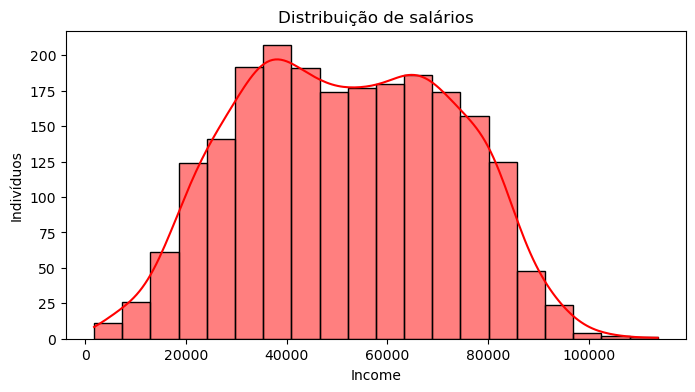

In [238]:
df.dropna(subset=['Income'], inplace=True)
plt.figure(figsize=(8, 4))
sns.histplot(df['Income'], bins=20, kde=True, color='Red')

plt.ylabel('Indivíduos')
plt.title('Distribuição de salários')

Em nossa base, podemos observar os seguintes pontos:

+ O maior salário presente em nossa base é de R$ 113.734,00.
+ O menor salário presente em nossa base é de R$ 1.730,00.
+ Não houve uma tendência clara entre os salários dos indivíduos, o que resultou em uma distribuição normal em nosso gráfico. Portanto, podemos afirmar que não há uma grande variação entre os clientes que ganham muito bem e os que ganham pouco, com apenas alguns indivíduos considerados outliers.

Text(0.5, 1.0, 'Distribuição de escolaridade')

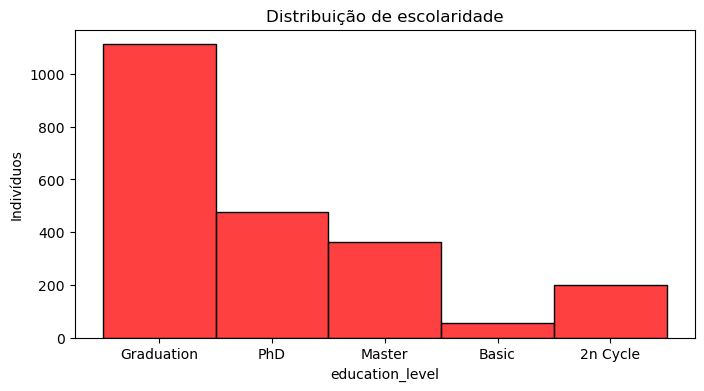

In [239]:
df.dropna(subset=['education_level'], inplace=True)
plt.figure(figsize=(8,4))
sns.histplot(df['education_level'], bins= 20, kde=False, color = 'Red')

plt.ylabel('Indivíduos')
plt.title('Distribuição de escolaridade')

Percebemos que, em nossa visualização, há um grande número de pessoas com o nível de escolaridade "Graduação", referindo-se ao ensino superior. Isso pode ser explicado pela significativa diferença na competitividade por vagas de emprego e pelos salários mais atrativos para aqueles que possuem ao menos uma graduação, como bacharelado ou tecnólogo.

In [240]:
single = df['marital_Single'].sum()
widow = df['marital_Widow'].sum()
divorced = df['marital_Divorced'].sum()
married = df['marital_Married'].sum()
together = df['marital_Together'].sum()

print(f' marital_Single: {single}\n marital_Widow: {widow}\n marital_Divorced: {divorced}\n marital_Married: {married}\n marital_Together: {toghether}')

 marital_Single: 1908.0
 marital_Widow: 152.0
 marital_Divorced: 230.0
 marital_Married: 4270.0
 marital_Together: 1704.0


Em nossa base temos: 
+ 1908 pessoas solteiras.
+ 152 viúvas.
+ 230 divorciados.
+ 4270 casadas.
+ 1704 em união estável.

#### Qual a idade média dos clientes?

In [249]:
age_Mean = df['Age'].mean()

print(int(age_Mean))

51


A idade média dos clientes é 51 anos.

#### 3. Análise de Correlações:

- Existe uma relação entre o estado civil e o número de filhos? As pessoas casadas tendem a ter mais filhos?
- O número de filhos influencia nos gastos na nossa plataforma? As pessoas com filhos gastam mais ou menos?
- A renda impacta nos gastos? Pessoas com maiores salários tendem a gastar mais?
- Qual a melhor estratégia para aumentar o engajamento de clientes em menor ascensão sobre os gastos na plataforma?
- Qual a relação entre a idade e os gastos em nossa plataforma? Pessoas com maior idade tendem a gastar mais ou menos? 
- A faixa etária que mais gasta é a que tem os maiores salários?

In [241]:
# kids : quantidade de filhos. 
df['kids'].describe()

count    2205.000000
mean        0.948753
std         0.749231
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: kids, dtype: float64

#### Existe uma relação entre o estado civil e o número de filhos? As pessoas casadas tendem a ter mais filhos?



Text(0.5, 1.0, 'Corelação de filhos com estado civil')

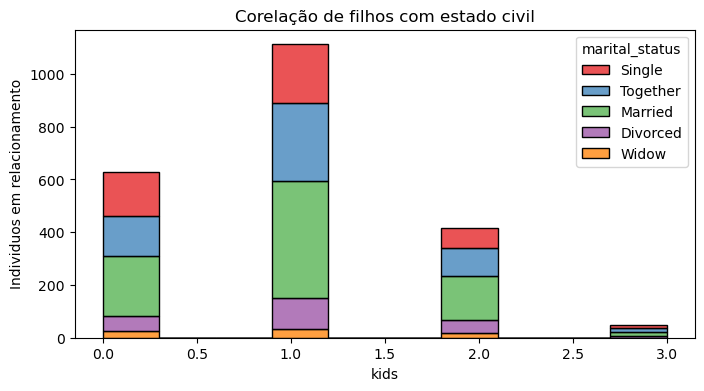

In [242]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='kids', hue='marital_status', multiple='stack', palette='Set1', bins=10)
plt.ylabel('Individuos em relacionamento')
plt.title('Corelação de filhos com estado civil')


- Como podemos observar no gráfico acima, as pessoas que estão em um relacionamento, seja ele um casamento ou apenas um relacionamento sério, tendem a ter mais filhos, principalmente os casados, que ocupam grande parte do gráfico.

#### O número de filhos influencia nos gastos na nossa plataforma? As pessoas com filhos gastam mais ou menos?

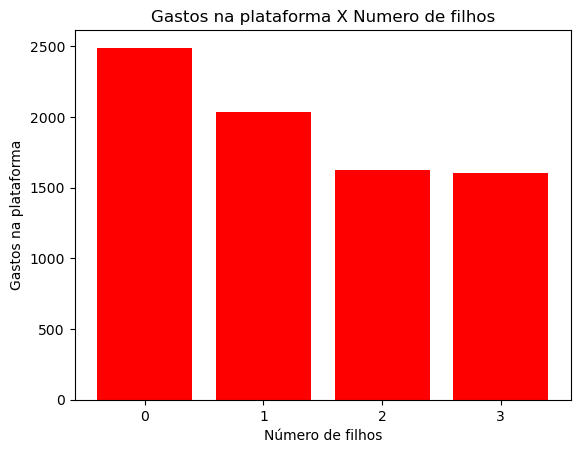

In [243]:
plt.bar(df['kids'], df['expenses'], color='red')
plt.xticks(np.arange(min(df['kids']), max(df['kids']) + 1, 1))

plt.title('Gastos na plataforma X Numero de filhos')
plt.xlabel('Número de filhos')
plt.ylabel('Gastos na plataforma')


plt.show()

- Sim, isso influencia de forma negativa aos olhos da empresa. Verificamos que a quantidade de filhos é inversamente proporcional à quantidade de gastos na plataforma; ou seja, quanto mais filhos o casal tem, menos ele gasta

#### A renda impacta nos gastos? Pessoas com maiores salários tendem a gastar mais?

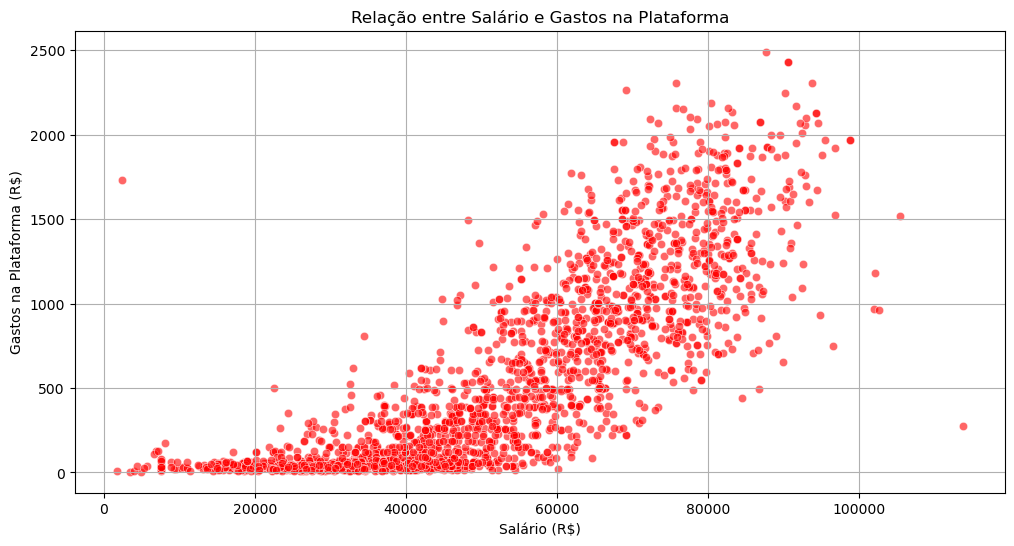

In [244]:
plt.figure(figsize=(12, 6))

plt.scatter(df['Income'], df['expenses'], alpha=0.6, c='red', edgecolors='w', linewidth=0.5)


plt.title('Relação entre Salário e Gastos na Plataforma')
plt.xlabel('Salário (R$)')
plt.ylabel('Gastos na Plataforma (R$)')
plt.grid(True)

plt.show()

- Como mostrado no gráfico acima, existe uma tendência de que, com salários maiores, os clientes tendem a gastar mais na plataforma. Observa-se também uma maior dispersão dos gastos em salários mais altos.

#### Qual a melhor estratégia para aumentar o engajamento de clientes em menor ascensão sobre os gastos na plataforma?

Como visualizado no gráfico, indivíduos com menores salários tendem a gastar menos na plataforma. Isso ocorre devido ao menor poder aquisitivo desses consumidores. Podemos atraí-los novamente diminuindo a porcentagem de lucro sobre o pedido para esse perfil de cliente-alvo e oferecendo valores promocionais na plataforma, o que pode gerar um aumento no montante total de vendas.

#### Qual a relação entre a idade e os gastos em nossa plataforma? Pessoas com maior idade tendem a gastar mais ou menos? 

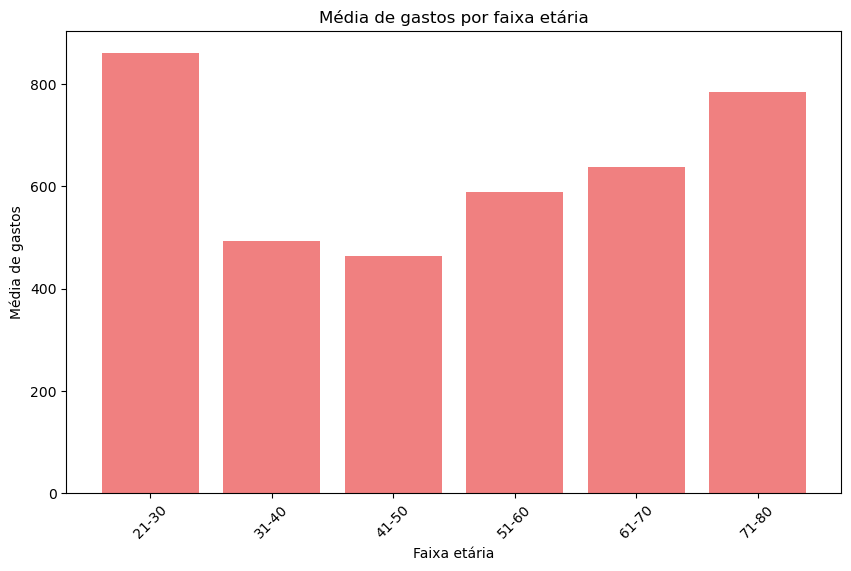

In [255]:
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

avg_expenses_age = df.groupby('age_group')['expenses'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_expenses_age['age_group'], avg_expenses_age['expenses'], color='lightcoral')
plt.xlabel('Faixa etária')
plt.ylabel('Média de gastos')
plt.title('Média de gastos por faixa etária')
plt.xticks(rotation=45)

plt.show()

Podemos observar que os clientes entre 21-30 anos tem um maior consumo na plataforma e isso tende a diminuir até os 60 anos, onde volta ter uma leve crescente. 

#### A faixa etária que mais gasta é a que tem os maiores salários?

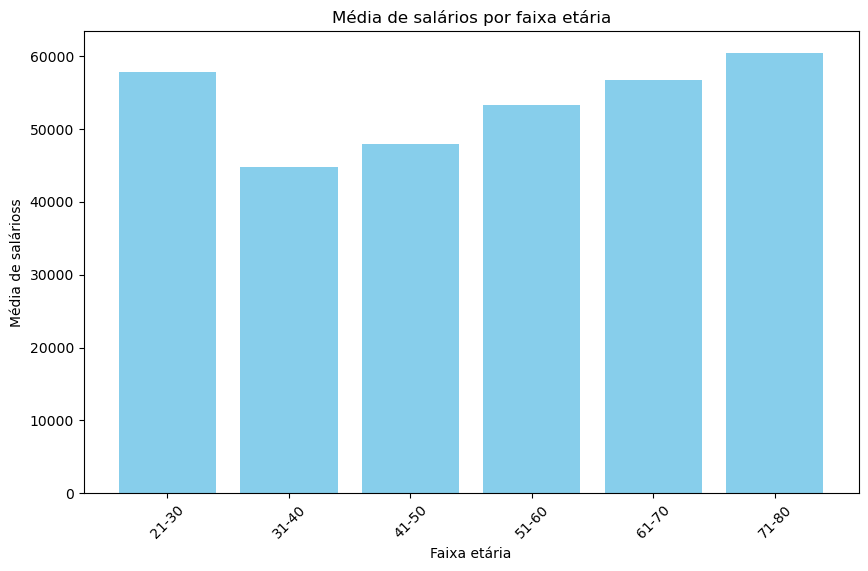

In [259]:
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

avg_salary_age = df.groupby('age_group')['Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_expenses_age['age_group'], avg_salary_age['Income'], color='skyblue')
plt.xlabel('Faixa etária')
plt.ylabel('Média de salárioss')
plt.title('Média de salários por faixa etária')
plt.xticks(rotation=45)

plt.show()

Podemos observar que os gastos são proporcionais aos ganhos. Pessoas entre 31 e 50 anos tendem a ganhar mais e gastar menos na plataforma. Considero que esse seja um ponto a ser explorado com mais dados fornecidos.